# Building up from the gas phase.
For this we'll be using the particula python package that is development by my colleagues and myself. 
For that we'll need to install it first.

The package information can be found here: https://uncscode.github.io/particula/intro.html

The github repo is here: https://github.com/uncscode/particula

In [1]:
# !pip install particula

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import particula as particula

In [3]:
particula.__version__ # check version 0.10

'0.0.10'

In [4]:
# plot sizes
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["font.size"] = (16)

 ## Gas phase


In [5]:
from particula import u
from particula.environment import Environment

In [6]:
Env_sample = Environment()

help(Env_sample)

Help on Environment in module particula.environment object:

class Environment(SharedProperties)
 |  Environment(**kwargs)
 |  
 |  creating the environment class
 |  
 |  For now, the environment class takes properties such as
 |  temperature and pressure to calculate derived properties
 |  such as viscosity and mean free path.
 |  
 |  Method resolution order:
 |      Environment
 |      SharedProperties
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, **kwargs)
 |      Initiate the environment class with base attrs.
 |  
 |  dynamic_viscosity(self)
 |      Returns the dynamic viscosity in Pa*s.
 |  
 |  mean_free_path(self)
 |      Returns the mean free path in m.
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from SharedProperties:
 |  
 |  dilution_rate_coefficient(self)
 |      get the dilution rate coefficient
 |  
 |  ----------------------------------------------------------------------
 |  Da

In [7]:
print("temperature is ", Env_sample.temperature) # will print 300 K
print("pressure is ", Env_sample.pressure) # %%

temperature is  298.15 kelvin
pressure is  101325 kilogram / meter / second ** 2


 That gives the default values for temperature and pressure.
 but what if we want to change it?

In [8]:
Env_sample.temperature = 250 * u.K

print("temperature is ", Env_sample.temperature) # will print 300 K

temperature is  250 kelvin


 what about these units? can we change them?

In [9]:
print("temperature is ", Env_sample.temperature.to(u.degC))
print("temperature is ", Env_sample.temperature.to(u.degF))

temperature is  -23.149999999999977 degree_Celsius
temperature is  -9.670000000000021 degree_Fahrenheit


 This is the pint package that is used in the particula package.
 It is a very useful package for handling units.
 It's documentation can be found here: https://pint.readthedocs.io/en/stable/

 You can change the temperature without `u.K` but is may break things later on.

 There are two main aspects the environmental class can calculate:
 1. The dynamic viscosity
 2. The mean free path

 ### Dynamic viscosity
 The dynamic viscosity is a property of the fluid, defining the resistance of the fluid to its own movement. The dynamic viscosity is calculated using the Sutherland formula ([reference](https://resources.wolframcloud.com/FormulaRepository/resources/Sutherlands-Formula)). The function can be found and is documented in `util.dynamic_viscosity.py`. It takes inputs of `temperature`, `reference_viscosity`, `reference_temperature`, and `sutherland_constant`. It returns a value for the dynamic viscosity at those variables. At default conditions (298.15 K and 101325 Pa), the dynamic viscosity is approximately 1.84e-5 kg/m/s. The Sutherland formula is
 $$
 \mu = \frac{\mu_{0}\, (T/T_{0})^{3/2}\, (T_{0} + C)}{C + T}
 $$
 where $\mu$ is the dynamic viscosity, $\mu_{0}$ is the reference dynamic viscosity, $T$ is temperature, $T_{0}$ is the reference temperature, and $C$ is the Sutherland constant.

In [10]:
Env_sample.dynamic_viscosity()

array(1.59905239e-05) <Unit('kilogram / meter / second')>

 or in more traditional units

In [11]:
Env_sample.dynamic_viscosity().to(u.Pa * u.s)

array(1.59905239e-05) <Unit('pascal * second')>

 lets change the temperature and see what happens

In [12]:
Env_sample.temperature = 500 *u.K
Env_sample.dynamic_viscosity().to(u.Pa * u.s)

array(2.67041e-05) <Unit('pascal * second')>

 ### Mean free path
 The mean free path is the average distance of a molecule between collisions with other molecules present in the medium. We use the kinetic theory of gases to calculate the mean free path in an ideal gas as
 $$
 \lambda = \frac{2 \mu / p}{(8 \, \mathrm{MW} / (\pi R T))^{1/2}}
 $$
 where $\lambda$ is the mean free path, $\mu$ is the dynamic viscosity, $p$ is the pressure, $\mathrm{MW}$ is the molecular weight, $R$ is the gas constant, $T$ is the temperature. As noted above, the user can provide an explicit value for $\mu$ or it can be calculated using the above formula (that is, the user can provide the inputs to the above formula for $\mu$). At default conditions, $\lambda$ is about 66.5 nm.

In [13]:
Env_sample.mean_free_path().to(u.nm)

array(125.13854395) <Unit('nanometer')>

In [14]:
test = Env_sample.mean_free_path().to(u.nm)
print('This unit tracker is a wrapper class around the values')
print(type(test))
print('So when you just want the value you can use .magnitude')
print(test.magnitude)

This unit tracker is a wrapper class around the values
<class 'pint.quantity.build_quantity_class.<locals>.Quantity'>
So when you just want the value you can use .magnitude
125.1385439501678


In [15]:
Env_sample.molecular_weight = 28.97 * u.g / u.mol # we can change the molecular weight of the molecule of interest

In [16]:
Env_sample.mean_free_path().to(u.nm)

array(125.12644851) <Unit('nanometer')>

 ### lets look at the temperature and pressure dependence of the mean free path

In [17]:
Env_base_pressure = Environment()
Env_higher_pressure = Environment(pressure=1.5 * u.atm)
Env_lower_pressure = Environment(pressure= 400 * u.hPa)


temperature_array = np.arange(100, 500, 10)

mean_free_path_array_base = np.zeros_like(temperature_array)
mean_free_path_array_higher = np.zeros_like(temperature_array)
mean_free_path_array_lower = np.zeros_like(temperature_array)

for i, temp in enumerate(temperature_array):
    Env_base_pressure.temperature = temp * u.K
    mean_free_path_array_base[i] = Env_base_pressure.mean_free_path().to(u.nm).magnitude

    Env_higher_pressure.temperature = temp * u.K
    mean_free_path_array_higher[i] = Env_higher_pressure.mean_free_path().to(u.nm).magnitude

    Env_lower_pressure.temperature = temp * u.K
    mean_free_path_array_lower[i] = Env_lower_pressure.mean_free_path().to(u.nm).magnitude

In [18]:
Env_base_pressure.mean_free_path().to(u.nm)

array(122.18477409) <Unit('nanometer')>

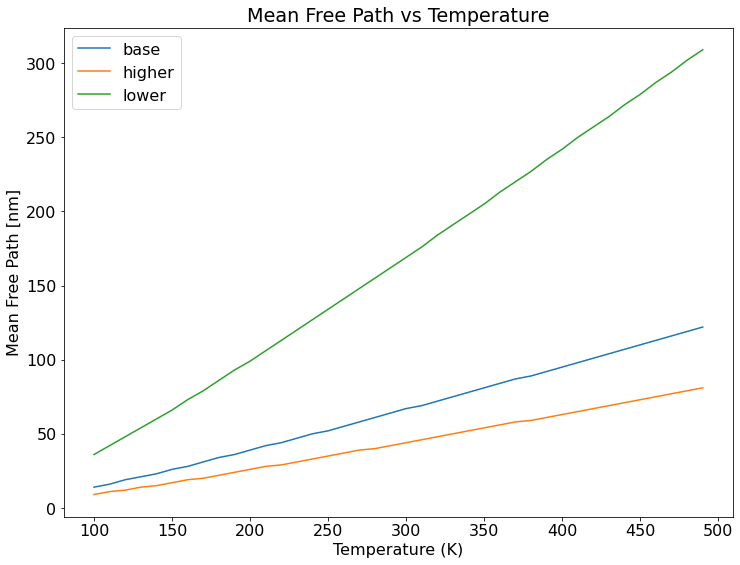

In [19]:
fig, ax = plt.subplots(1, 1)
ax.plot(temperature_array, mean_free_path_array_base, label='base')
ax.plot(temperature_array, mean_free_path_array_higher, label='higher')
ax.plot(temperature_array, mean_free_path_array_lower, label='lower')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Mean Free Path [nm]')
ax.set_title('Mean Free Path vs Temperature')
ax.legend()

In [20]:
Env_base_temperature = Environment()
Env_higher_temperature = Environment(temperature=250 * u.K)
Env_lower_temperature = Environment(temperature= 250 * u.K)

Env_higher_temperature.molecular_weight = 500.97 * u.g / u.mol
Env_lower_temperature.molecular_weight = 4.97 * u.g / u.mol

pressure_array = np.arange(.1, 3, 0.01)

mean_free_path_array_base = np.zeros_like(pressure_array)
mean_free_path_array_higher = np.zeros_like(pressure_array)
mean_free_path_array_lower = np.zeros_like(pressure_array)

for i, pres in enumerate(pressure_array):
    Env_base_temperature.pressure = pres * u.atm
    mean_free_path_array_base[i] = Env_base_temperature.mean_free_path().to(u.nm).magnitude

    Env_higher_temperature.pressure = pres * u.atm
    mean_free_path_array_higher[i] = Env_higher_temperature.mean_free_path().to(u.nm).magnitude

    Env_lower_temperature.pressure = pres * u.atm
    mean_free_path_array_lower[i] = Env_lower_temperature.mean_free_path().to(u.nm).magnitude

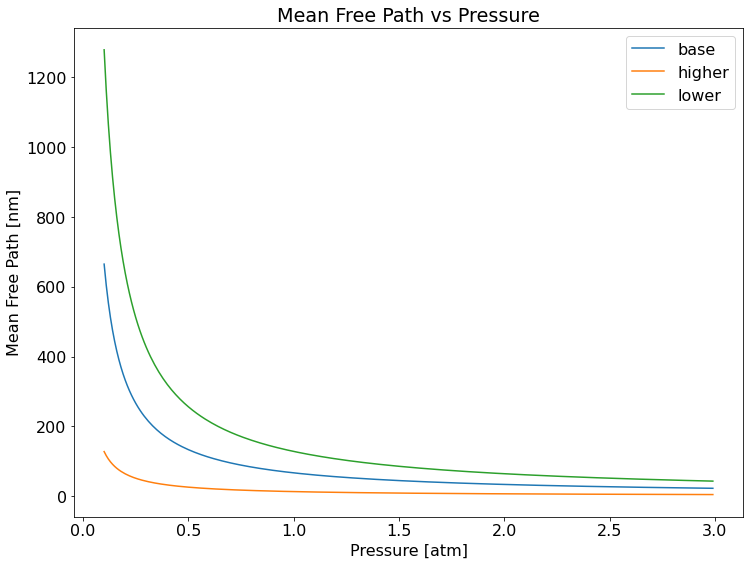

In [21]:
fig, ax = plt.subplots(1, 1,)
ax.plot(pressure_array, mean_free_path_array_base, label='base')
ax.plot(pressure_array, mean_free_path_array_higher, label='higher')
ax.plot(pressure_array, mean_free_path_array_lower, label='lower')
ax.set_xlabel('Pressure [atm]', )
ax.set_ylabel('Mean Free Path [nm]',  )
ax.set_title('Mean Free Path vs Pressure',  )
ax.legend()

## Particles 
All these molecule collisions have effects on particles in the air. The most important of these is the Brownian motion of particles. The Brownian motion of a particle is the random motion of a particle due to collisions with other molecules in the medium. This then results in molecule to particle collisions.

first we need a particle class

In [22]:
from particula import particle
help(particle)

Help on module particula.particle in particula:

NAME
    particula.particle - the particule class

CLASSES
    particula.vapor.Vapor(particula.environment.Environment)
        ParticleDistribution
            ParticleInstances
                ParticleCondensation
                    ParticleWallLoss
                        Particle
    
    class Particle(ParticleWallLoss)
     |  Particle(**kwargs)
     |  
     |  the Particle class!
     |  
     |  Method resolution order:
     |      Particle
     |      ParticleWallLoss
     |      ParticleCondensation
     |      ParticleInstances
     |      ParticleDistribution
     |      particula.vapor.Vapor
     |      particula.environment.Environment
     |      particula.environment.SharedProperties
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  __init__(self, **kwargs)
     |      particle objects.
     |  
     |  coagulation(self, other: 'Particle' = None)
     |      Dimensioned particle--partic

In [23]:
# lets make a particle object.
Particle_sample = particle.Particle(particle_radius=100 * u.nm)
print(Particle_sample.particle_mass().to(u.ng))

4.188790204786391e-06 nanogram


 lets look at some of the properties of the particle

In [24]:
print('radius = ', Particle_sample.particle_radius.to(u.nm))
print('surface area = ', Particle_sample.particle_area().to(u.nm**2))
print('density = ', Particle_sample.particle_density.to(u.g / u.cm**3))

radius =  100.0 nanometer
surface area =  125663.70614359173 nanometer ** 2
density =  1.0000000000000002 gram / centimeter ** 3


 ### Charge of the particle
 some particles can be charged. This is important for the particle to particle interactions and it can enhance collisions with molecules. The charge of the particle is set by the user. The default is zero charge.

In [25]:
print('charge = ', Particle_sample.particle_charge)

charge =  0 dimensionless


## Particle-Molecule (i.e., gas) interactions

Brownian motion is the random motion of a particle due to collisions with other molecules in the medium. This then results in molecule to particle collisions.
[wiki](https://en.wikipedia.org/wiki/Brownian_motion)

Brownian motion [m^2/s] 
$$ <X^2> = <Y^2> = <Z^2> = 2 k T \frac{C_c}{3 \pi \mu D_p} t  $$
Where 
$$ aerodyanmic~mobility~B~=~\frac{C_c}{3 \pi \mu D_p}  $$
Diffusivity
$$ D = B k T  $$
therefore Brownian motion is 
$$ <X^2> = <Y^2> = <Z^2> = 2 D t  $$



In [26]:
from particula.util.diffusion_coefficient import pdc as particle_diffusion_coefficient

Env_base = Environment()

Particle_one = particle.Particle(particle_radius=[100,200] * u.nm)
time = 1 * u.s

x_bar2 = 2*particle_diffusion_coefficient(Env_base.temperature,rad=Particle_one.particle_radius, radius=Particle_one.particle_radius) * time

print(x_bar2)

print('Linear distance = ', np.sqrt(x_bar2.to(u.um**2)))


[4.4849325354810963e-10 1.6911460784301448e-10] meter ** 2
Linear distance =  [21.17765930286229 13.004407246891898] micrometer


### plot of Diffusion coefficient vs size

c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Linear Diffusion Distance vs Radius')

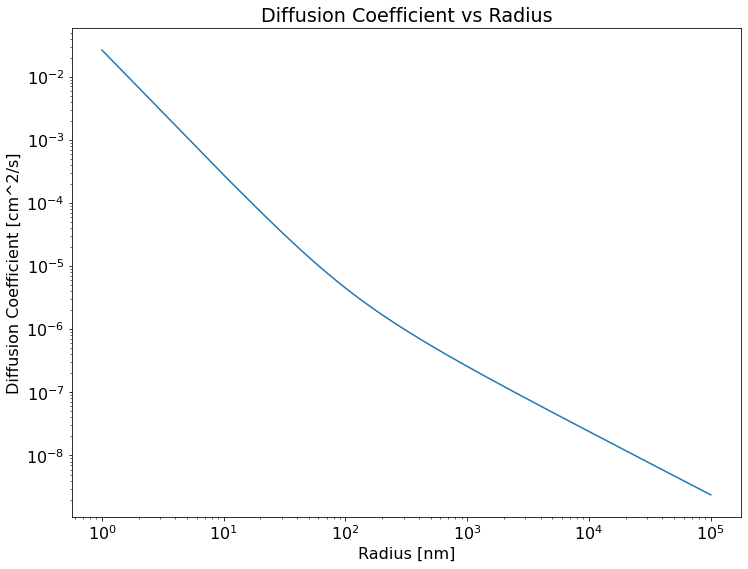

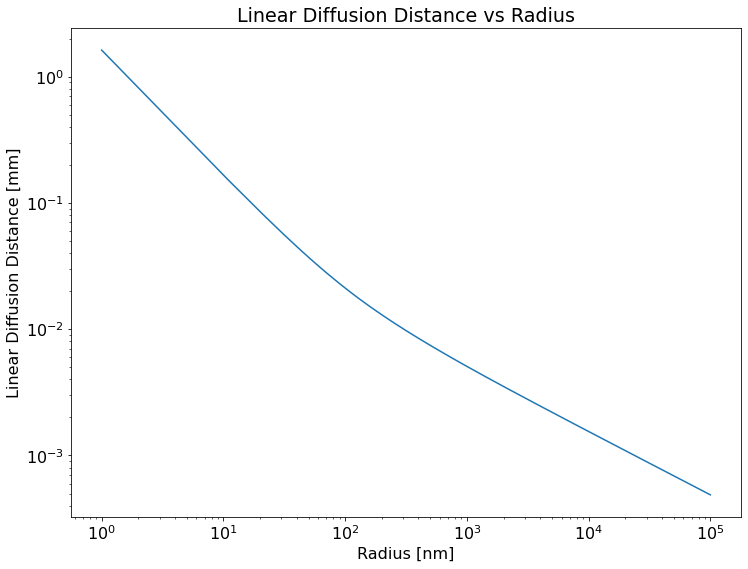

In [27]:
Env_base = Environment()

radii = np.arange(1, 100000, 10) * u.nm
Particle_array = particle.Particle(particle_radius=radii)
time = 1 * u.s

x_bar2 = 2*particle_diffusion_coefficient(Env_base.temperature,rad=Particle_array.particle_radius, radius=Particle_array.particle_radius) * time

fig, ax = plt.subplots(1, 1,  )
ax.loglog(radii, x_bar2.to(u.cm**2))
ax.set_xlabel('Radius [nm]',  )
ax.set_ylabel('Diffusion Coefficient [cm^2/s]',  )
ax.set_title('Diffusion Coefficient vs Radius',  )

fig, ax = plt.subplots(1, 1,  )
ax.loglog(radii, np.sqrt(x_bar2.to(u.mm**2)))
ax.set_xlabel('Radius [nm]',  )
ax.set_ylabel('Linear Diffusion Distance [mm]',  )
ax.set_title('Linear Diffusion Distance vs Radius',  )


# now the drag force 
Where first we'll define a friction factor for the particle.

$$ f_p~=~\frac{3 \pi D_p \mu}{D_c}  $$

So the drag force is
$$ F_d~=~f_p v_p  $$

For gravitational settling we then get (fluid velocity u_(fluid))
$$ m_p \frac{dv}{dt}~=~m_pg + f_p (u_{fluid}-v_p)  $$

The relaxation time to the particle to the fluid velocity, in free fall, is then
$$ \tau~=~\frac{m_p}{f_p}  $$

The settling velocity as a function of time is then
$$ v_{t}~=~\tau g (1-exp(-t/\tau))  $$

At t = long time we have the terminal velocity, which is the case when $t>>\tau$
$$ v_{term}~=~\tau*g = \frac{m_p}{f_p}*g  $$

In [28]:
Particle_one = particle.Particle(particle_radius=100 * u.nm)
time = 1 * u.s

tau = Particle_one.particle_mass()/Particle_one.friction_factor()

tau


Magnitude,[2.2818990725421453e-07]
Units,second


In [29]:
from particula.constants import STANDARD_GRAVITY # import gravity

v_terminal = Particle_one.particle_mass()/Particle_one.friction_factor() * STANDARD_GRAVITY
v_terminal

Magnitude,[2.2377785539745428e-06]
Units,meter/second


1.3133867637782016e-05 millimeter


c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Terminal Distance traveled in 1 sec vs Radius')

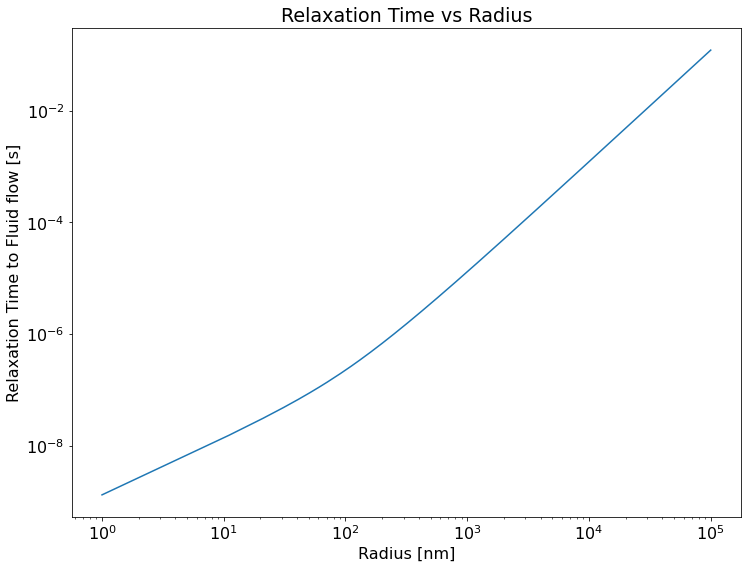

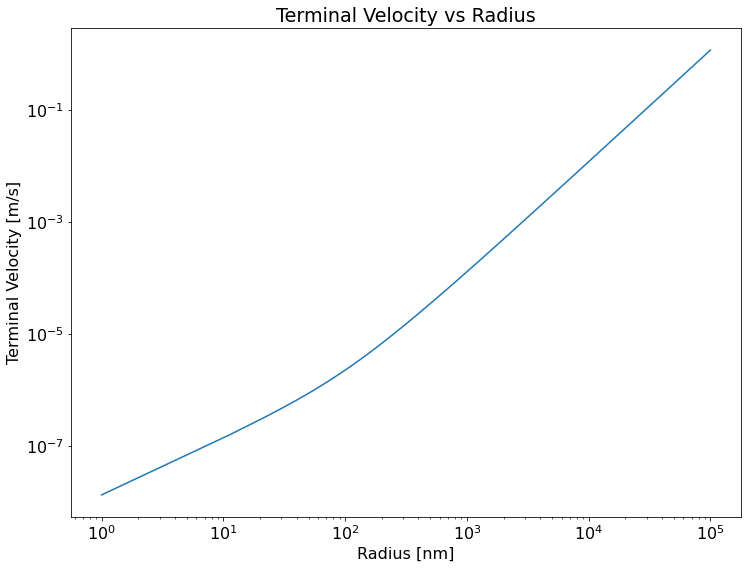

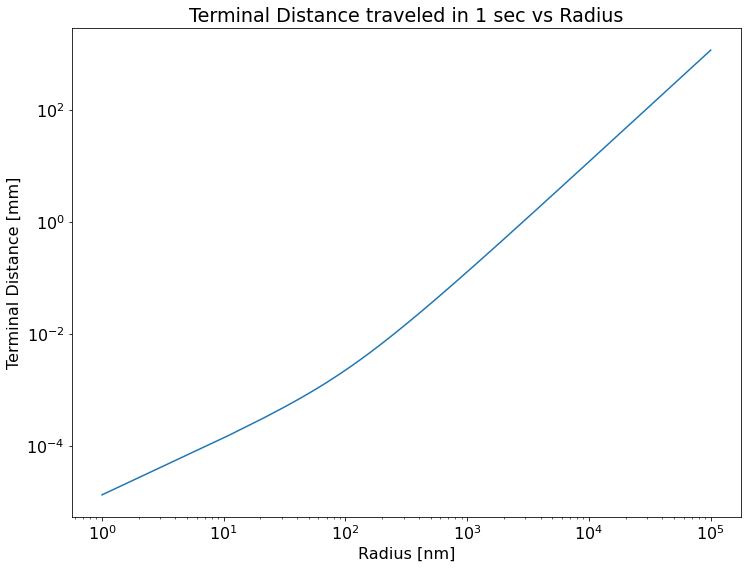

In [30]:
Env_base = Environment()

Particle_array = particle.Particle(particle_radius=radii)

tau = Particle_array.particle_mass()/Particle_array.friction_factor()

v_term = tau * STANDARD_GRAVITY

distance_terminal = v_term*time
print(distance_terminal[0].to(u.mm))

fig, ax = plt.subplots(1, 1,  )
ax.loglog(radii, tau)
ax.set_xlabel('Radius [nm]',  )
ax.set_ylabel('Relaxation Time to Fluid flow [s]',  )
ax.set_title('Relaxation Time vs Radius',  )

fig, ax = plt.subplots(1, 1,  )
ax.loglog(radii, v_term)
ax.set_xlabel('Radius [nm]',  )
ax.set_ylabel('Terminal Velocity [m/s]',  )
ax.set_title('Terminal Velocity vs Radius',  )

fig, ax = plt.subplots(1, 1,  )
ax.loglog(radii, distance_terminal.to(u.mm))
ax.set_xlabel('Radius [nm]',  )
ax.set_ylabel('Terminal Distance [mm]',  )
ax.set_title('Terminal Distance traveled in 1 sec vs Radius',  )

### Distance travel by particle Falling vs Brownian motion

c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


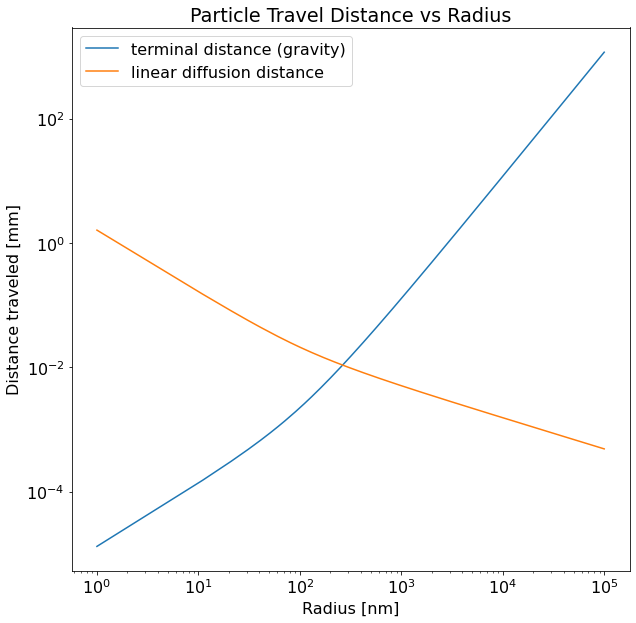

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.loglog(radii, distance_terminal.to(u.mm), label='terminal distance (gravity)')
ax.loglog(radii, np.sqrt(x_bar2.to(u.mm**2)), label='linear diffusion distance')
ax.set_xlabel('Radius [nm]',  )
ax.set_ylabel('Distance traveled [mm]',  )
ax.set_title('Particle Travel Distance vs Radius',  )
ax.legend()
plt.show()

## Fall time
Another example could be the time for a droplet to fall to the floor of the cloud chamber. 

38069517.20463947 second


c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Particle Fall time vs Radius')

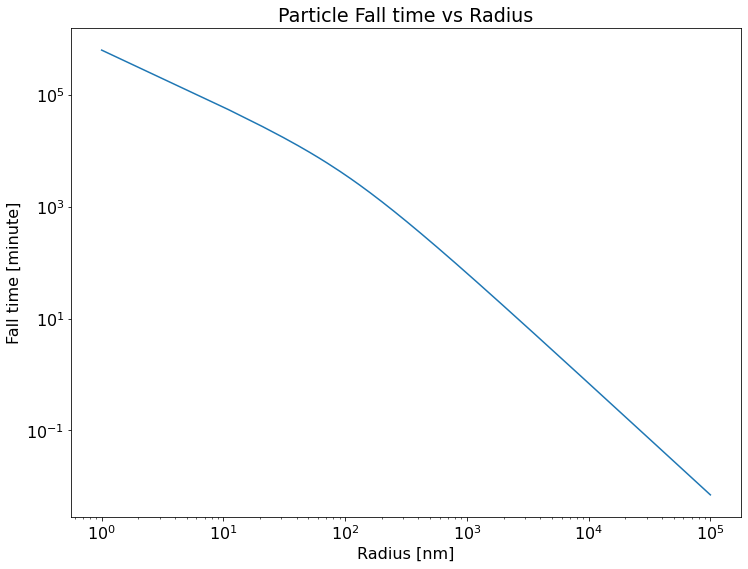

In [32]:
fall_height = 0.5 * u.m

chamber_fall_out_time = fall_height/v_term
print(chamber_fall_out_time[0])

fig, ax = plt.subplots(1, 1,  )
ax.loglog(radii.to(u.nm), chamber_fall_out_time.to(u.minute))
ax.set_xlabel('Radius [nm]',  )
ax.set_ylabel('Fall time [minute]',  )
ax.set_title('Particle Fall time vs Radius',  )

 ### Particle to particle interactions
 when we get more than one particle in the air, they can interact with each other. This is important for aerosol formation and growth.

In [33]:
Particle_one = particle.Particle(particle_radius=100 * u.nm)
Particle_two = particle.Particle(particle_radius=200 * u.nm)

To run these coagulations, the pairwise interactions are needed so we setup the `coagulation` method to receive another particle object. 

In [34]:
# lets look at the coagulation coeffient
Particle_one.coagulation(Particle_two).to(u.cc/u.s)[0][0] # compare to book table 13.2, 13.3
Particle_one.coagulation().to(u.cc/u.s)[0][0] # compare to book table 13.2, 13.3

array(1.05034745e-09) <Unit('cubic_centimeter / second')>

In [35]:
Particle_two = particle.Particle(particle_radius=1000 * u.nm)
Particle_one.coagulation(Particle_two).to(u.cc/u.s)[0][0] # compare to book table 13.2, 13.3

array(3.24558118e-09) <Unit('cubic_centimeter / second')>

c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


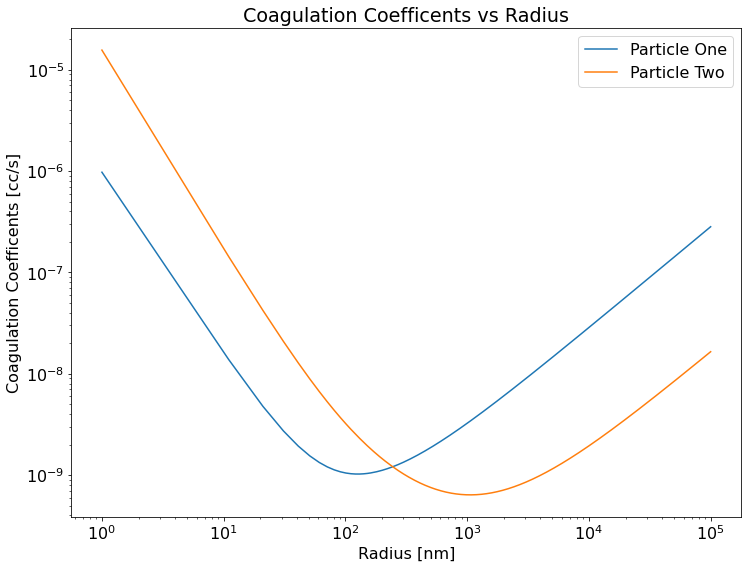

In [36]:
radii = np.arange(1, 100000, 10) * u.nm
Particle_array = particle.Particle(particle_radius=radii)

coagulation_array = Particle_array.coagulation(Particle_one).to(u.cc/u.s)
coagulation_array2 = Particle_array.coagulation(Particle_two).to(u.cc/u.s)

fig, ax = plt.subplots(1, 1,)
ax.loglog(radii, coagulation_array, label= 'Particle One')
ax.loglog(radii, coagulation_array2, label= 'Particle Two')
ax.set_xlabel('Radius [nm]',  )
ax.set_ylabel('Coagulation Coefficents [cc/s]',  )
ax.set_title('Coagulation Coefficents vs Radius',  )
ax.legend()

This turns into a rate when we know the number of particles in the air.

Assume we have 1e5 particles/cc of for each pair of interactions. So P1 and P2 will have 1e5 particles each.

$$ J_{12}~=~K_{12}~N_{1}~N_{2}  $$

c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


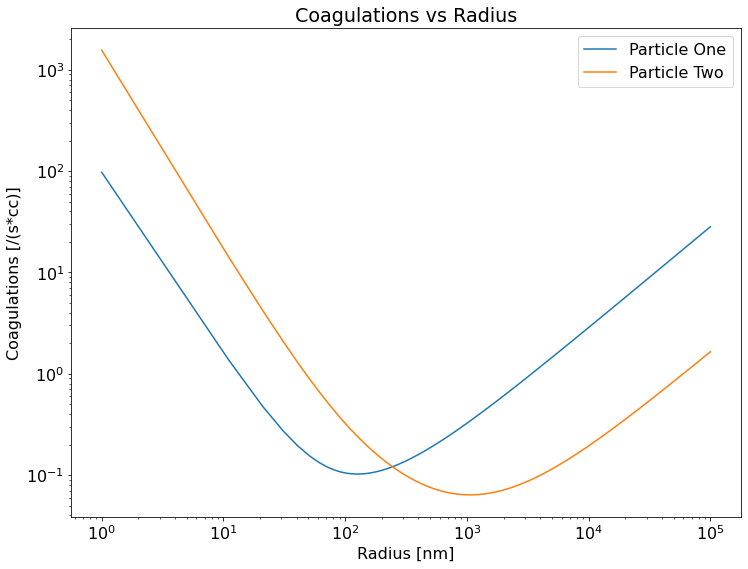

In [37]:
particle_concentration = 1e4 * u.cm**-3
coagulation_rate = Particle_array.coagulation(Particle_one).to(u.cc/u.s) *particle_concentration *particle_concentration
coagulation_rate2 = Particle_array.coagulation(Particle_two).to(u.cc/u.s) *particle_concentration *particle_concentration

fig, ax = plt.subplots(1, 1,)
ax.loglog(radii, coagulation_rate, label= 'Particle One')
ax.loglog(radii, coagulation_rate2, label= 'Particle Two')
ax.set_xlabel('Radius [nm]',  )
ax.set_ylabel('Coagulations [/(s*cc)]',  )
ax.set_title('Coagulations vs Radius',  )
ax.legend()

## Charge Enhancement
The charge enhancement is a factor that is used to enhance the collision rate of charged particles with molecules. The charge enhancement is calculated using the following formula



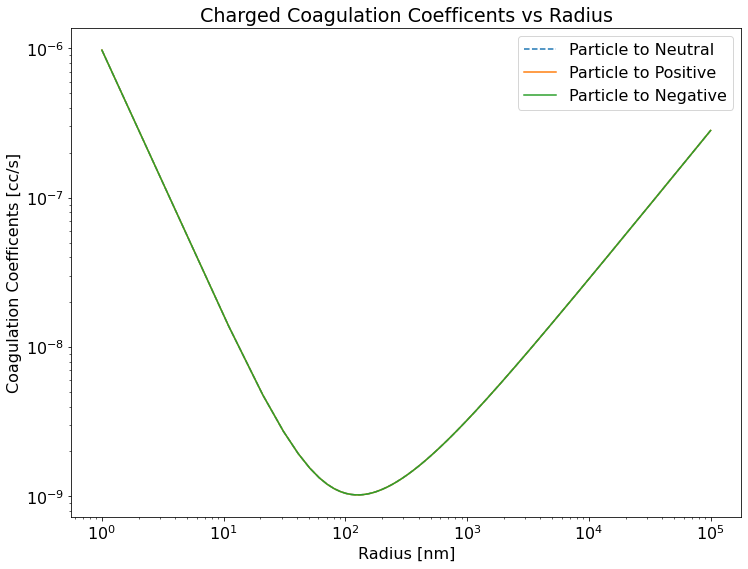

In [38]:
radii = np.arange(1, 100000, 10) * u.nm
Particle_one = particle.Particle(particle_radius=100*u.nm, particle_charge=0 )
Particle_array_neutral = particle.Particle(particle_radius=radii)
Particle_array_pos1 = particle.Particle(particle_radius=radii, particle_charge=1)
Particle_array_neg1 = particle.Particle(particle_radius=radii, particle_charge=-1)


fig, ax = plt.subplots(1, 1,)
ax.loglog(radii.m, Particle_array_neutral.coagulation(Particle_one).to(u.cc/u.s).m, label= 'Particle to Neutral',linestyle='--')
ax.loglog(radii.m, Particle_array_pos1.coagulation(Particle_one).to(u.cc/u.s).m, label= 'Particle to Positive', )
ax.loglog(radii.m, Particle_array_neg1.coagulation(Particle_one).to(u.cc/u.s).m, label= 'Particle to Negative', )
ax.set_xlabel('Radius [nm]',  )
ax.set_ylabel('Coagulation Coefficents [cc/s]',  )
ax.set_title('Charged Coagulation Coefficents vs Radius',  )
ax.legend()

In [39]:
Particle_array_pos1.particle_charge

array(1) <Unit('dimensionless')>

## Coagulation in time

Now this binary coagulation rate is easy to visualize, but things get more complicated after the first collision. 

You P1 and P2 collide and form P3. Now P3 can collide with P1, P2, P3, forming P4, P5, P6, etc.

The last simple thing we can look at is self coagulation time scales. 
$$ \tau_{self}~=~\frac{2}{K_{self}N_{self}}  $$

In [40]:
radii = np.logspace(1, 4, 100) * u.nm
Particle_array_log = particle.Particle(particle_radius=radii)

coagulation_coefficent = Particle_array_log.coagulation()
print(np.shape(coagulation_coefficent))
coagulation_coefficent[0]

(100, 100)


Magnitude,[2.306525014899979e-15 2.3296099111493988e-15 2.3687303755329908e-15 2.4240187467159584e-15 2.495655254177264e-15 2.5838756179344526e-15 2.6889819629962785e-15 2.8113553484426395e-15 2.9514683205543607e-15 3.109896272888422e-15 3.287326895547546e-15 3.484567490193436e-15 3.702550326817799e-15 3.942336482942705e-15 4.205118736426247e-15 4.492224104436217e-15 4.805116567611449e-15 5.1454004228413116e-15 5.51482459674553e-15 5.915288143111415e-15 6.3488470523340055e-15 6.81772242489017e-15 7.324310005853456e-15 7.871191042804748e-15 8.461144413147801e-15 9.097159965912161e-15 9.782453034326757e-15 1.0520480095374853e-14 1.1314955577924343e-14 1.2169869848928904e-14 1.3089508435163317e-14 1.407847256413139e-14 1.5141701130933996e-14 1.6284494217379085e-14 1.7512538305352702e-14 1.8831933338762207e-14 2.0249221797813966e-14 2.1771419956768606e-14 2.3406051502459885e-14 2.5161183696583306e-14 2.7045466270793985e-14 2.9068173250631564e-14 3.123924791272252e-14 3.3569351089986556e-14 3.606991305197406e-14 3.8753189202162576e-14 4.1632319851134614e-14 4.4721394344060774e-14 4.803551984277087e-14 5.159089508681065e-14 5.540488948411135e-14 5.949612791009496e-14 6.388458162405123e-14 6.85916657433558e-14 7.36403437495146e-14 7.905523953517721e-14 8.486275753832099e-14 9.109121154903546e-14 9.777096281606964e-14 1.0493456812494472e-13 1.126169385673774e-13 1.2085550977339605e-13 1.2969042443318018e-13 1.3916472799561801e-13 1.4932457849507016e-13 1.6021947152711006e-13 1.719024814682947e-13 1.8443052011461027e-13 1.9786461399846397e-13 2.122702017353449e-13 2.2771745284901976e-13 2.4428160962883955e-13 2.620433536849584e-13 2.8108919898755957e-13 3.0151191330515727e-13 3.2341097009533317e-13 3.468930330495398e-13 3.720724756526082e-13 3.9907193828809395e-13 4.2802292560341447e-13 4.590664470447784e-13 4.923537036821266e-13 5.280468246697196e-13 5.663196569297208e-13 6.073586119053196e-13 6.513635735078649e-13 6.98548871680489e-13 7.491443263202842e-13 8.03396366643728e-13 8.615692314475057e-13 9.239462561108497e-13 9.908312526079775e-13 1.0625499892522179e-12 1.139451777379123e-12 1.2219111726967397e-12 1.3103297995896702e-12 1.4051383072623847e-12 1.5067984672494274e-12 1.6158054225086048e-12 1.7326900990516061e-12]
Units,meter3/second


In [41]:
self_coaguluation_coefficient = np.zeros_like(radii)
for i, radius in enumerate(radii):
    self_coaguluation_coefficient[i] = coagulation_coefficent[i][i].magnitude
self_coaguluation_coefficient = self_coaguluation_coefficient * u.m**3/u.s


c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


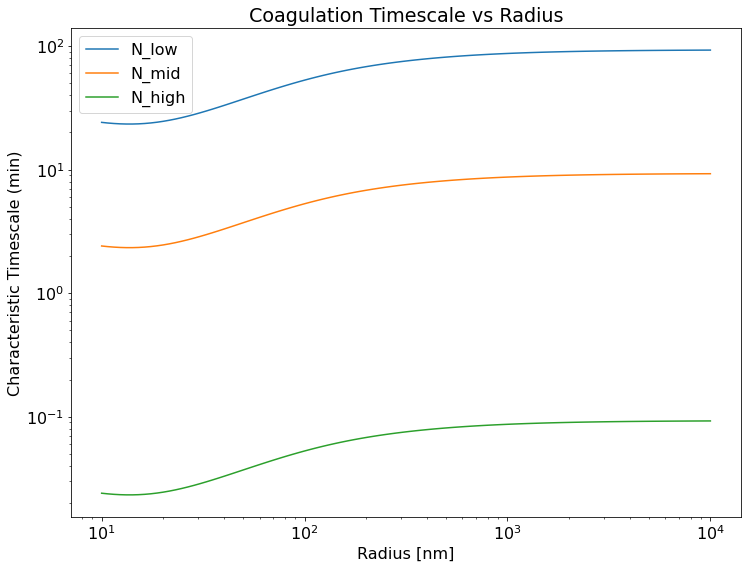

In [42]:
N_low = 1e4 * u.cm**-3
N_mid = 1e5 * u.cm**-3
N_high = 1e7 * u.cm**-3

tau_low = 2/(self_coaguluation_coefficient * N_low.to(u.m**-3))
tau_mid = 2/(self_coaguluation_coefficient * N_mid.to(u.m**-3))
tau_high = 2/(self_coaguluation_coefficient * N_high.to(u.m**-3))


fig, ax = plt.subplots(1, 1,)
ax.loglog(radii, tau_low.to(u.hr), label= 'N_low')
ax.loglog(radii, tau_mid.to(u.hr), label= 'N_mid')
ax.loglog(radii, tau_high.to(u.hr), label= 'N_high')

ax.set_xlabel('Radius [nm]',  )
ax.set_ylabel('Characteristic Timescale (min)',  )
ax.set_title('Coagulation Timescale vs Radius',  )
ax.legend()

## Coagulation of a size distributions


In [43]:
# re import the classes and include the rates
from particula.particle import Particle
from particula.rates import Rates

In [44]:
def plot_some(x, y, grid="semilogx", title=None, label=None):
    """ plot y vs x with grid, providing title and label """
    if grid == "loglog":
        plt.loglog(x.m, y.m, label=label)
    else:
        plt.semilogx(x.m, y.m, label=label);
    if label is not None:
        plt.legend()
    plt.title(title)
    plt.xlabel(f"{x.u}"); plt.ylabel(f"{y.u}");

In [45]:
# define a dictionary of the log normal parameters
specifics = {
    "mode": 100e-9,
    "gsigma": 1.6,
    "nbins": 2000,
    "nparticles": 1e5, # 1e4 #
    "volume": 1e-6, # /cc
    "spacing": 'logspace',
}

# specifics = {
#     "mode": [50e-9, 500e-9],
#     "gsigma": [1.6, 1.6],
#     "nbins": 2000,
#     "nparticles": [1e5,1e5], # 1e4 #
#     "volume": 1e-6, # /cc
#     "spacing": 'logspace',
# }


part_dist = Particle(**specifics)



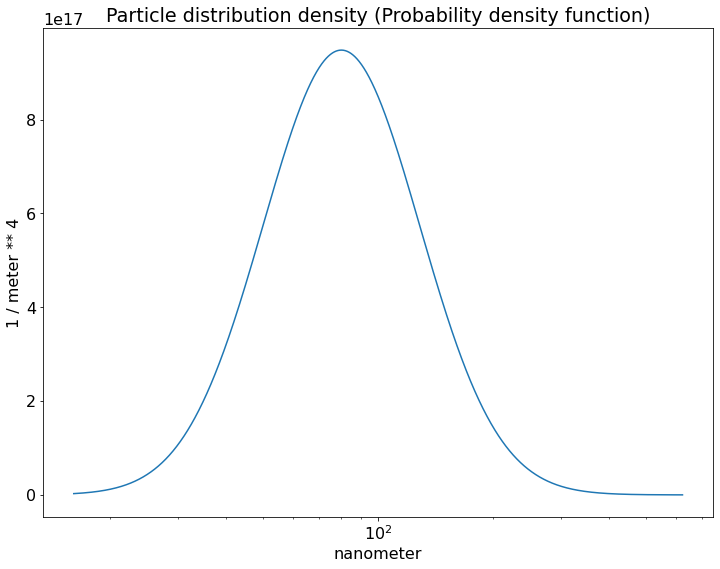

In [46]:
plot_some(
    x=part_dist.particle_radius.to(u.nm),
    y=part_dist.particle_distribution(),
    title="Particle distribution density (Probability density function)",
)


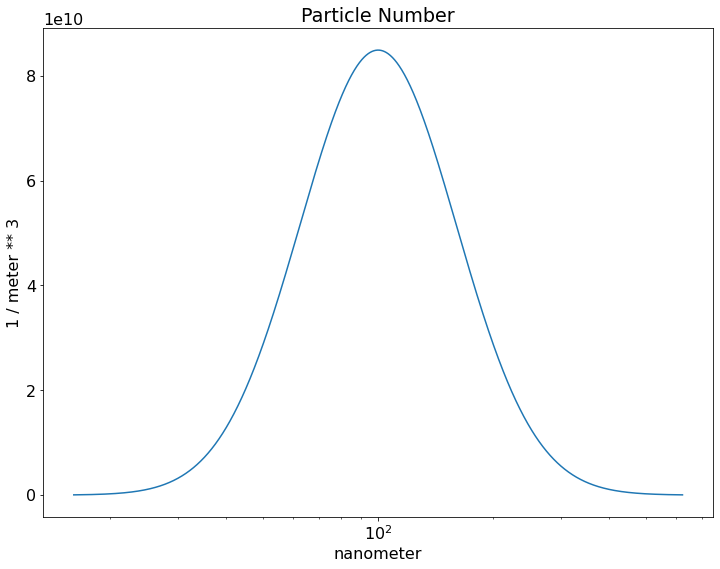

In [47]:
plot_some(
    x=part_dist.particle_radius.to(u.nm),
    y=part_dist.particle_distribution()*part_dist.particle_radius,
    title="Particle Number",
)

Total number of particles in the air

In [48]:
total_N = np.trapz(part_dist.particle_distribution(), part_dist.particle_radius)
print(total_N.to(u.cm**-3))

99990.05557690273 / centimeter ** 3


Coagulation Coefficient is not very complex, as it depends on the whole distribution.


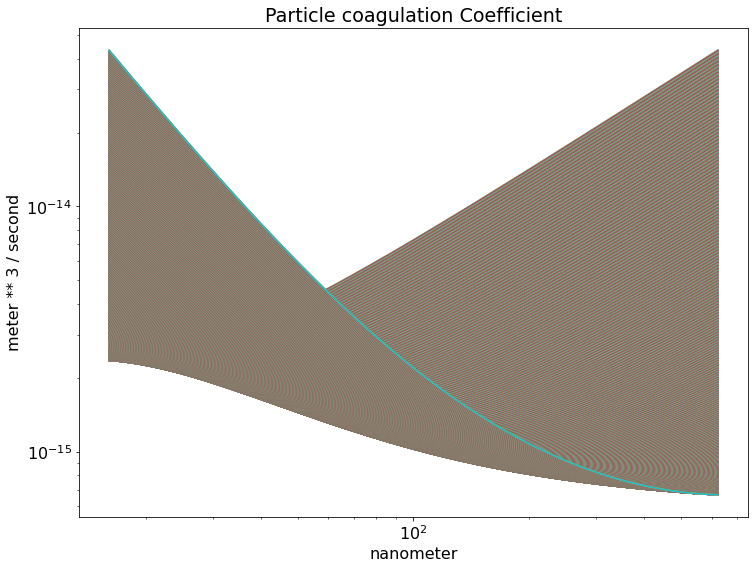

In [49]:
plot_some(
    x=part_dist.particle_radius.to(u.nm),
    y=part_dist.coagulation(),
    title="Particle coagulation Coefficient",
    grid="loglog"
)

In [50]:
r = Rates(particle=part_dist, lazy=False)

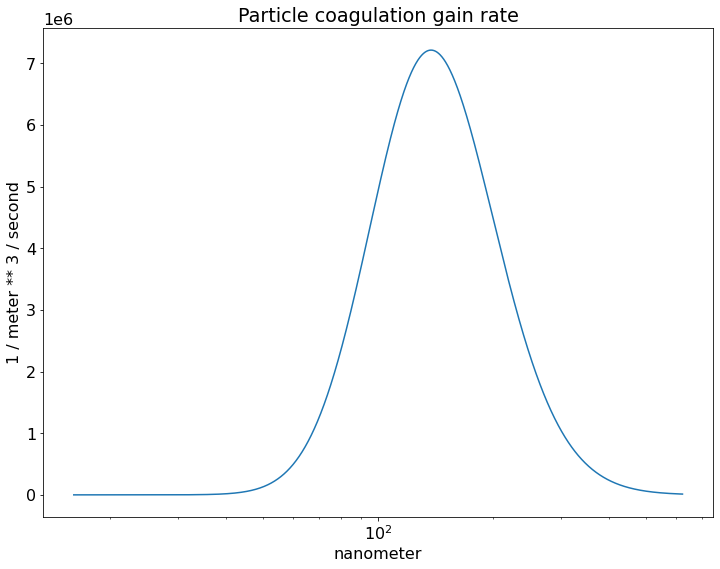

In [51]:
plot_some(
    x=part_dist.particle_radius.to(u.nm),
    y=r.coagulation_gain()*part_dist.particle_radius,
    title="Particle coagulation gain rate",
)

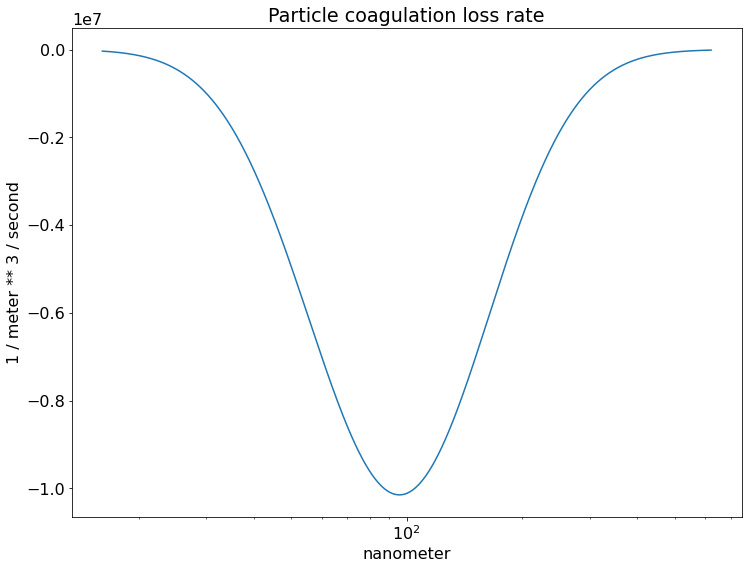

In [52]:
plot_some(
    x=part_dist.particle_radius.to(u.nm),
    y=-r.coagulation_loss()*part_dist.particle_radius,
    title="Particle coagulation loss rate",
)

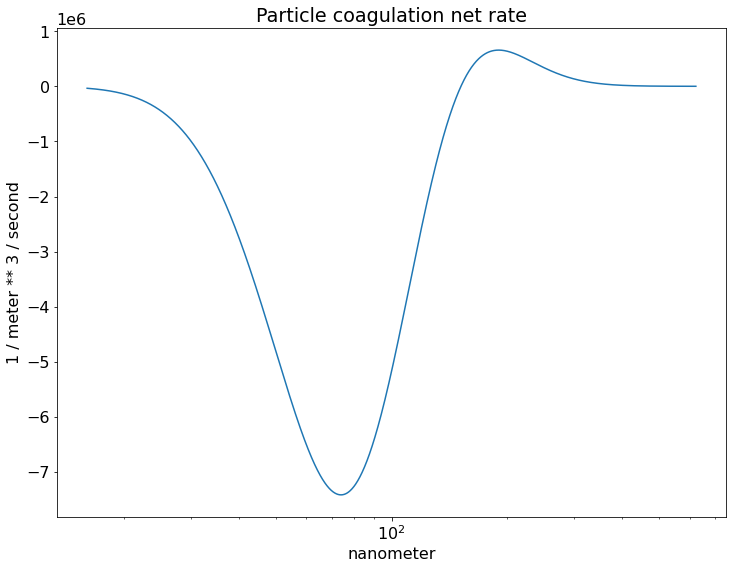

In [53]:
plot_some(
    x=part_dist.particle_radius.to(u.nm),
    y=r.coagulation_rate()*part_dist.particle_radius,
    title="Particle coagulation net rate",
)

Comare the coagulation rate to the size distribution

c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Coagulation Rate and Size dist.')

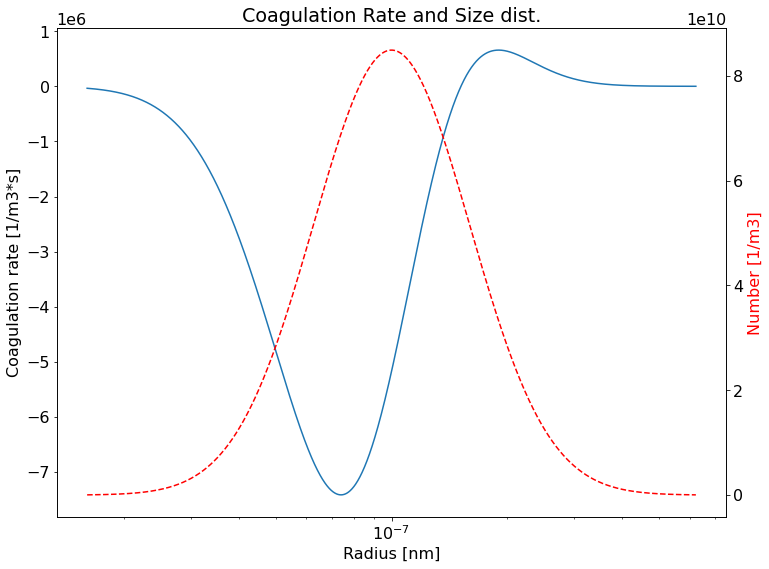

In [54]:
fig, ax = plt.subplots(1, 1,)
ax.semilogx(part_dist.particle_radius.m, r.coagulation_rate()*part_dist.particle_radius, label= 'Coagulation Rate')
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.semilogx(part_dist.particle_radius.m, part_dist.particle_distribution()*part_dist.particle_radius, label= 'number', color='r', linestyle='--')
ax2.set_ylabel('Number [1/m3]', color='r' )
ax.set_xlabel('Radius [nm]',  )
ax.set_ylabel('Coagulation rate [1/m3*s]',  )
ax.set_title('Coagulation Rate and Size dist.',  )

## Run time forward

In [55]:
# import and ODE solver
from particula.dynamics import Solver


In [291]:
specifics = {
    "mode": 100e-9,
    "gsigma": 1.6,
    "nbins": 200,
    "nparticles": 1e6, # 1e4 #
    "volume": 1e-6, # /cc
    "spacing": 'linspace',
    "vapor_concentration": 0, # no vapors
}

part_dist = Particle(**specifics)

c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


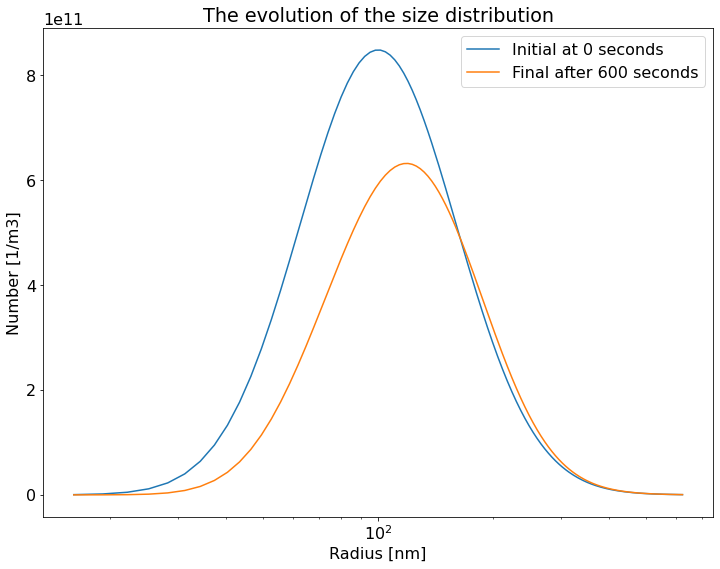

In [292]:
time_span = [0, 600] # seconds
s = Solver(particle=part_dist, time_span=time_span)
sols = s.solution()

fig, ax = plt.subplots(1, 1,)
ax.semilogx(part_dist.particle_radius.to(u.nm).m, sols[0]*part_dist.particle_radius, label=f"Initial at {time_span[0]} seconds")
ax.semilogx(part_dist.particle_radius.to(u.nm).m, sols[-1]*part_dist.particle_radius, label=f"Final after {time_span[-1]} seconds")
ax.set_xlabel('Radius [nm]')
ax.set_ylabel('Number [1/m3]')
ax.set_title("The evolution of the size distribution")
ax.legend()

c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


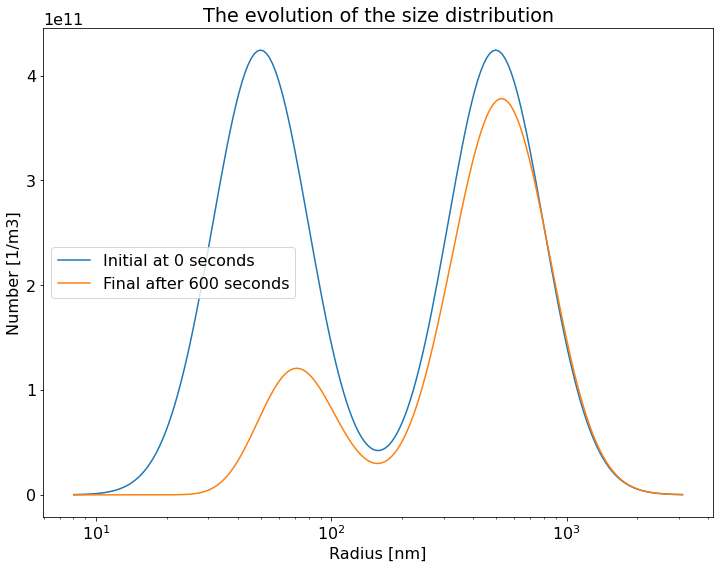

In [293]:
specifics = {
    "mode": [50e-9, 500e-9],
    "gsigma": [1.6, 1.6],
    "nbins": 200, # fewer bins is faster, but less accurate
    "nparticles": [1e6,1e6], # 1e4 #
    "volume": 1e-6, # /cc
    "spacing": 'logspace',
    "vapor_concentration": 0, # no vapors**
}

part_dist_two = Particle(**specifics)

time_span = [0, 600] # seconds
s = Solver(particle=part_dist_two, time_span=time_span)
sols = s.solution()

# plot the results
fig, ax = plt.subplots(1, 1,)
ax.semilogx(part_dist_two.particle_radius.to(u.nm).m, sols[0]*part_dist_two.particle_radius, label=f"Initial at {time_span[0]} seconds")
ax.semilogx(part_dist_two.particle_radius.to(u.nm).m, sols[-1]*part_dist_two.particle_radius, label=f"Final after {time_span[-1]} seconds")
ax.set_xlabel('Radius [nm]')
ax.set_ylabel('Number [1/m3]')
ax.set_title("The evolution of the size distribution")
ax.legend()


## what about the charge enhancement?

c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


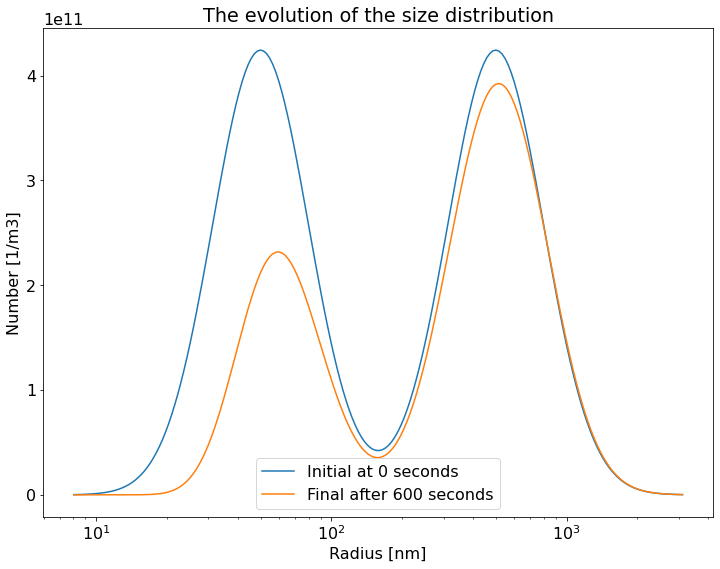

In [294]:

specifics = {
    "mode": [50e-9, 500e-9],
    "gsigma": [1.6, 1.6],
    "nbins": 200, # fewer bins is faster, but less accurate
    "nparticles": [1e6,1e6], # 1e4 #
    "particle_charge": -2,
    "volume": 1e-6, # /cc
    "spacing": 'logspace',
    "vapor_concentration": 0, # no vapors
}

part_dist_two = Particle(**specifics)

time_span = [0, 600] # seconds
s = Solver(particle=part_dist_two, time_span=time_span)
sols = s.solution()

# plot the results
fig, ax = plt.subplots(1, 1,)
ax.semilogx(part_dist_two.particle_radius.to(u.nm).m, sols[0]*part_dist_two.particle_radius, label=f"Initial at {time_span[0]} seconds")
ax.semilogx(part_dist_two.particle_radius.to(u.nm).m, sols[-1]*part_dist_two.particle_radius, label=f"Final after {time_span[-1]} seconds")
ax.set_xlabel('Radius [nm]')
ax.set_ylabel('Number [1/m3]')
ax.set_title("The evolution of the size distribution")
ax.legend()

# Ambient aerosol

lower number, and wider distributions

c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
c:\Users\kkgor\anaconda3\envs\AtmClass\lib\site-packages\numpy\core\_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


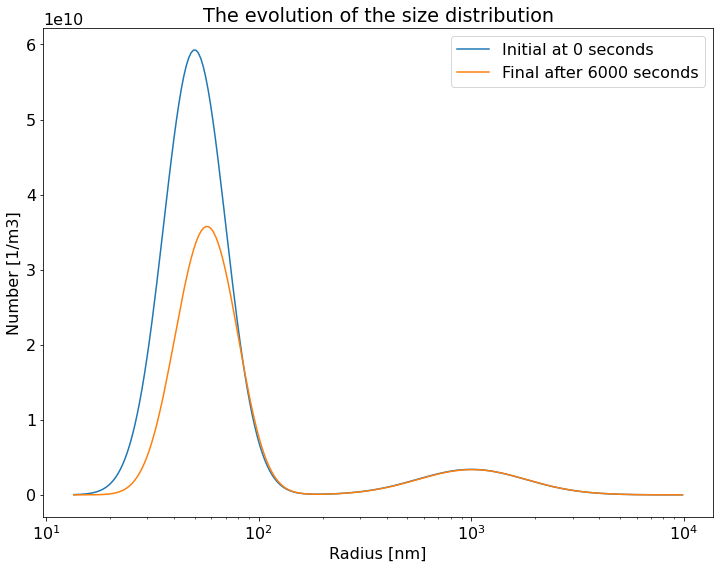

In [95]:
specifics = {
    "mode": [50e-9, 1000e-9],
    "gsigma": [1.4, 1.8],
    "nbins": 250, # fewer bins is faster, but less accurate
    "nparticles": [1e5,1e4], # 1e4 #
    "particle_charge": 0,
    "volume": 1e-6, # /cc
    "spacing": 'logspace',
    "vapor_concentration": 0, # no vapors
    "particle_formation_rate": 0,
}

part_dist_two = Particle(**specifics)

time_span = [0, 6000] # seconds
s = Solver(particle=part_dist_two, time_span=time_span)
sols = s.solution()

# plot the results
fig, ax = plt.subplots(1, 1,)
ax.semilogx(part_dist_two.particle_radius.to(u.nm).m, sols[0]*part_dist_two.particle_radius, label=f"Initial at {time_span[0]} seconds")
ax.semilogx(part_dist_two.particle_radius.to(u.nm).m, sols[-1]*part_dist_two.particle_radius, label=f"Final after {time_span[-1]} seconds")
ax.set_xlabel('Radius [nm]')
ax.set_ylabel('Number [1/m3]')
ax.set_title("The evolution of the size distribution")
ax.legend()